In [1]:
import torch
from torch import nn #neural networks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

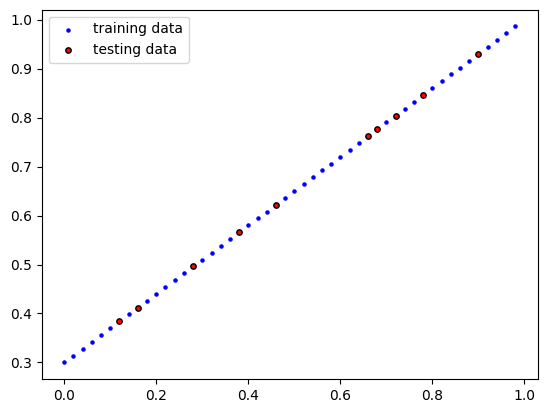

In [2]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
def plot_predictions(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, predictions = None):
  plt.scatter(X_train, y_train, c='blue', s=5, label='training data')
  plt.scatter(X_test,y_test, c='red', edgecolors='black', s=15, label='testing data')
  if predictions is not None:
    plt.scatter(X_test, predictions, c='purple', s=15, label='predictions')
  plt.legend()
plot_predictions()

In [3]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [4]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [5]:
with torch.inference_mode(): #may make stuff faster on big datasets; only for predictions
  y_pred = model_0(X_test)
#plot_predictions(predictions=y_pred)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [6]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Epoch: 0 | Loss: 0.34703248739242554 | Test_loss: 0.3454439640045166
Epoch: 10 | Loss: 0.2236068695783615 | Test_loss: 0.22056639194488525
Epoch: 20 | Loss: 0.10700180381536484 | Test_loss: 0.10165400803089142
Epoch: 30 | Loss: 0.06075896695256233 | Test_loss: 0.05625184625387192
Epoch: 40 | Loss: 0.0488271564245224 | Test_loss: 0.04429147392511368
Epoch: 50 | Loss: 0.042974211275577545 | Test_loss: 0.03893987089395523
Epoch: 60 | Loss: 0.03785329312086105 | Test_loss: 0.03418963775038719
Epoch: 70 | Loss: 0.03273237496614456 | Test_loss: 0.029439400881528854
Epoch: 80 | Loss: 0.027611464262008667 | Test_loss: 0.02468917891383171
Epoch: 90 | Loss: 0.022498100996017456 | Test_loss: 0.020065296441316605


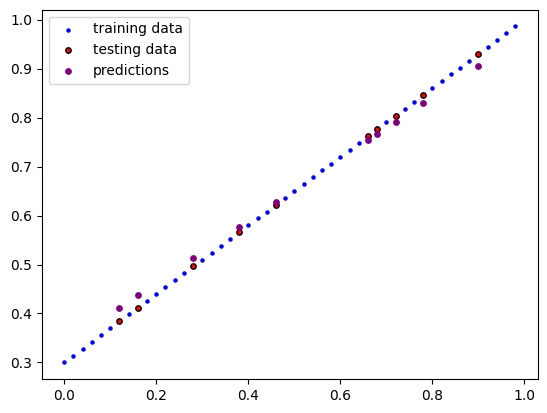

In [7]:
epochs = 100 #number of loops
for epoch in range(epochs):
  model_0.train() #train mode -> sets requires_grad to True where needed
  y_pred = model_0(X_train)
  loss = loss_fn(y_train, y_pred)
  optimizer.zero_grad() #resets gradient
  loss.backward() #do backpropagation
  optimizer.step() # do gradient descent
  model_0.eval() #evaluation mode -> turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(predictions=y_pred_new)

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6323])), ('bias', tensor([0.3363]))])

In [9]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [10]:
# Instantiate a fresh instance of LinearRegressionModel
loaded_model_1 = LinearRegressionModel()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cuda:0
